In [136]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

df = pd.read_csv('shopping_trends_updated.csv')
df.drop('Customer ID', axis=1, inplace=True)

X = df.drop("Item Purchased", axis=1)
y = df['Item Purchased']

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [138]:
missing_cols = [col for col in X_train.columns if X_train[col].isnull().any]
missing_cols

['Age',
 'Gender',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']

In [139]:
def categorical_to_dummies(dataset, col):
    new_dataset = dataset
    for col_name in col:
        new_dataset = pd.concat([new_dataset, pd.get_dummies(new_dataset.loc[:, col_name], dtype='int', prefix=col_name, prefix_sep='_')], axis=1)
        new_dataset = new_dataset.drop(col_name, axis = 1)
    return new_dataset

cat_cols = [col for col in X_train.columns if X_train[col].dtype=='object']

In [140]:
X_train = categorical_to_dummies(X_train, cat_cols)
X_test = categorical_to_dummies(X_test, cat_cols)

In [141]:
Y_train.nunique()

25

In [142]:
class_mapping = {'Blouse': 0, 'Shorts': 1, 'Pants': 2, 'Shirt': 3, 'Dress': 4, 'Jewelry': 5, 'Sweater': 6, 'Coat': 7, 'Jacket': 8, 'Sunglasses': 9, 'Sandals': 10, 'Scarf': 11, 'Socks': 12, 'Handbag':13, 'Belt':14, 'Hat':15, 'Backpack':16, 'Hoodie':17, 'Shoes':18, 'Skirt':19, 'T-shirt':20, 'Boots':21, 'Sneakers':22, 'Gloves':23, 'Jeans':24}
Y_train =Y_train.map(class_mapping)
Y_test = Y_test.map(class_mapping)

In [143]:
Y_train.unique()

array([ 7, 14,  1,  6, 12,  4, 15, 10, 11, 19, 17,  9,  3, 22, 16, 21, 24,
        0,  5, 13, 23,  8, 18,  2, 20], dtype=int64)

In [144]:
Y_train = Y_train.fillna(Y_train.median())
Y_test = Y_test.fillna(Y_test.median())

In [145]:
from sklearn.impute import SimpleImputer

x_imp = SimpleImputer(strategy='median')
xtraincols = X_train.columns

X_train = pd.DataFrame(x_imp.fit_transform(X_train))
X_test = pd.DataFrame(x_imp.transform(X_test))

X_train.columns = xtraincols
X_test.columns = xtraincols


In [146]:
Y_train.isnull().values.any()

False

In [147]:
Y_train.nunique()

25

In [148]:
from imblearn.over_sampling import RandomOverSampler
ov_sampler = RandomOverSampler(random_state=0)
X_train, Y_train = ov_sampler.fit_resample(X_train, Y_train)

In [149]:
pd.DataFrame(Y_train).value_counts().sort_values

<bound method Series.sort_values of Item Purchased
0                 143
13                143
23                143
22                143
21                143
20                143
19                143
18                143
17                143
16                143
15                143
14                143
12                143
1                 143
11                143
10                143
9                 143
8                 143
7                 143
6                 143
5                 143
4                 143
3                 143
2                 143
24                143
Name: count, dtype: int64>

In [150]:
Y_train.nunique()

25

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.51865053,  0.17731563,  0.91043275, ..., -0.40464426,
        -0.40791516, -0.40557997],
       [-1.32147452, -0.75222341,  0.21143844, ..., -0.40464426,
         2.45149014, -0.40557997],
       [ 0.05875753, -0.49871277, -0.20795814, ..., -0.40464426,
        -0.40791516, -0.40557997],
       ...,
       [ 1.37326425, -1.04798584, -0.62735472, ..., -0.40464426,
        -0.40791516,  2.46560498],
       [-0.07269314, -0.16069857, -0.62735472, ...,  2.47130651,
        -0.40791516, -0.40557997],
       [-0.26986915,  1.14910645, -0.62735472, ..., -0.40464426,
         2.45149014, -0.40557997]])

## Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

entropy_model = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=50, max_leaf_nodes=20, ccp_alpha=0.01)
entropy_model.fit(X_train, Y_train)
entropy_pred = entropy_model.predict(X_test)

In [153]:
Y_train.value_counts()

Item Purchased
7     143
22    143
2     143
18    143
8     143
23    143
13    143
5     143
0     143
24    143
21    143
16    143
3     143
14    143
9     143
17    143
19    143
11    143
10    143
15    143
4     143
12    143
6     143
1     143
20    143
Name: count, dtype: int64

In [154]:
from sklearn.metrics import classification_report
print(classification_report(np.round(entropy_pred), Y_test))

              precision    recall  f1-score   support

           0       0.21      0.11      0.14        55
           1       0.00      0.00      0.00        10
           2       0.09      0.05      0.07        57
           3       0.00      0.00      0.00         9
           4       0.07      0.12      0.09        16
           5       0.23      0.26      0.24        31
           6       0.03      0.05      0.04        21
           7       0.43      0.39      0.41        31
           8       0.39      0.43      0.41        28
           9       0.13      0.24      0.17        17
          10       0.47      0.33      0.39        45
          11       0.10      0.15      0.12        20
          12       0.12      0.05      0.07        78
          13       0.11      0.11      0.11        28
          14       0.15      0.13      0.14        47
          15       0.24      0.14      0.18        56
          16       0.17      0.14      0.15        29
          17       0.06    

## MLP

In [155]:
from tensorflow import keras
from keras import layers

input_layer = layers.Input(shape=(118,))
dense_1 = layers.Dense(256, activation='relu')(input_layer)
dropout = layers.Dropout(0.5)(dense_1)
batch_norm = layers.BatchNormalization()(dropout)
dense_2 = layers.Dense(128, activation='relu')(batch_norm)
dense_3 = layers.Dense(64, activation='relu')(dense_2)
dense_4 = layers.Dense(32, activation='relu')(dense_3)
output_layer = layers.Dense(25, activation='relu')(dense_4)

model = keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = [tf.keras.losses.categorical_crossentropy, 'mae'],
    metrics = tf.keras.metrics.Accuracy()
)

In [156]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
                 mode='min',
                 min_delta = 0.0001,
                 patience = 30,
                 restore_best_weights=True
)

In [157]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train__y_labels = label_as_binary.fit_transform(Y_train)
test__y_labels =label_as_binary.transform(Y_test)

pd.DataFrame(train__y_labels).value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1     143
                                  1   0   0   0   0   0   0   0   0   0   0   0   0   0     143
   1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
   0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
      0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
         0  1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
            0  1  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
               0  1  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
                  0  1  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0     143
                     0  1  0  0   0   0   0   0

In [158]:
history = model.fit(
            X_train, train__y_labels,
            validation_data=[X_test, test__y_labels],
            batch_size=5000,
            callbacks=[early_stopping],
            epochs=10000
)

Epoch 1/10000


1/1 [==============================] - 2s 2s/step - loss: 9.0141 - accuracy: 0.4479 - val_loss: 8.1675 - val_accuracy: 0.3996
Epoch 2/10000
1/1 [==============================] - 0s 70ms/step - loss: 8.6749 - accuracy: 0.4240 - val_loss: 7.9649 - val_accuracy: 0.3803
Epoch 3/10000
1/1 [==============================] - 0s 76ms/step - loss: 8.4415 - accuracy: 0.4060 - val_loss: 7.7372 - val_accuracy: 0.3633
Epoch 4/10000
1/1 [==============================] - 0s 78ms/step - loss: 8.1806 - accuracy: 0.3881 - val_loss: 7.4536 - val_accuracy: 0.3485
Epoch 5/10000
1/1 [==============================] - 0s 77ms/step - loss: 7.9943 - accuracy: 0.3718 - val_loss: 7.2035 - val_accuracy: 0.3335
Epoch 6/10000
1/1 [==============================] - 0s 75ms/step - loss: 7.7044 - accuracy: 0.3538 - val_loss: 7.0875 - val_accuracy: 0.3207
Epoch 7/10000
1/1 [==============================] - 0s 72ms/step - loss: 7.3495 - accuracy: 0.3400 - val_loss: 6.8556 - val_accuracy: 0.3069
Epoch 8/10000
1/1 [===

Min val loss: 2.5558


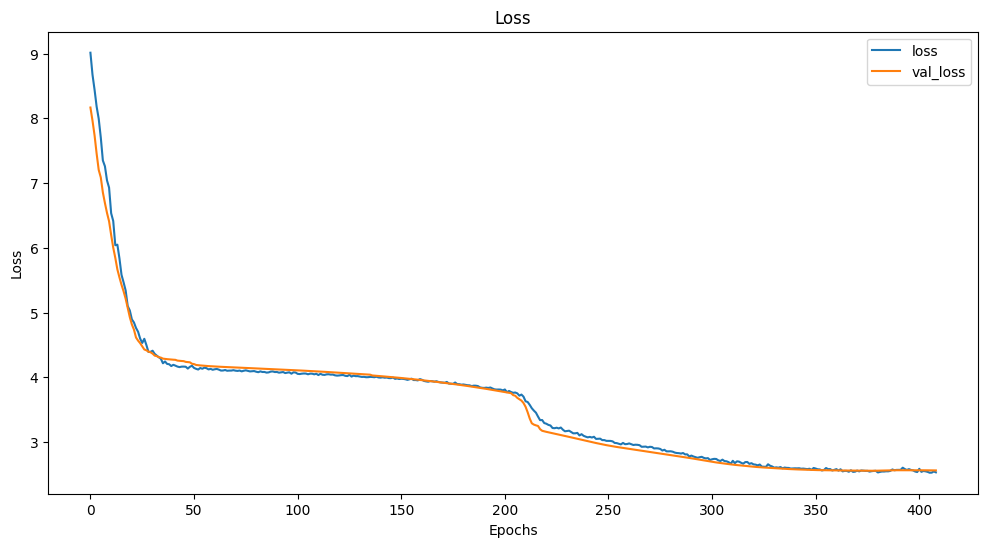

In [159]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title='Loss', figsize=(12, 6), xlabel='Epochs', ylabel='Loss')
print(('Min val loss: {:0.4f}').format(history_df['val_loss'].min()))

Max val accuracy: 0.6839


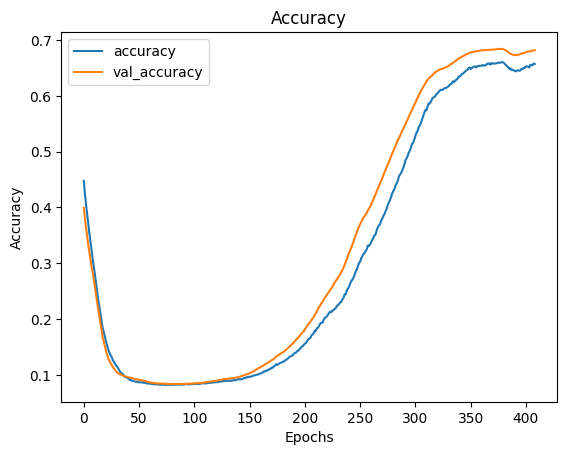

In [160]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
print(('Max val accuracy: {:0.4f}').format(history_df['val_accuracy'].max()))